<a href="https://colab.research.google.com/github/fhk-8/Rossmann_sales_prediction/blob/main/Rossamnn_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets numpy pandas matplotlib seaborn --quiet

In [ ]:
!pip install jovian xgboost graphviz lightgbm scikit-learn --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import os
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)
%matplotlib inline

In [ ]:
od.download('https://www.kaggle.com/competitions/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: esmaelyasin
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 884MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [ ]:
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'test.csv', 'train.csv', 'store.csv']

In [ ]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv')
test_df = pd.read_csv('rossmann-store-sales/test.csv')
store_df = pd.read_csv('rossmann-store-sales/store.csv')
submission_df = pd.read_csv('rossmann-store-sales/sample_submission.csv')

/tmp/ipython-input-3177678989.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df = pd.read_csv('rossmann-store-sales/train.csv')


In [ ]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [ ]:

merged_df = pd.merge(ross_df,store_df, on = 'Store', how = 'left')
merged_test_df = pd.merge(test_df,store_df, on = 'Store', how = 'left')

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Pre processing and fdeature enginnering

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
def split_date(df):
  df['Date'] = pd.to_datetime(merged_df['Date'])
  df['Year' ] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week
  return df

In [ ]:
split_date(merged_df)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [ ]:
split_date(merged_test_df)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,1,4,2015-07-31,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,3,4,2015-07-31,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,7,4,2015-07-31,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,7,31,31
3,4,8,4,2015-07-31,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,9,4,2015-07-31,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-06-25,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,6,25,26
41084,41085,1112,6,2015-06-25,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,6,25,26
41085,41086,1113,6,2015-06-25,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,6,25,26
41086,41087,1114,6,2015-06-25,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,6,25,26


In [ ]:
merged_df[merged_df.Open == 0].Sales.value_counts()

,count
Sales,
0,172817


In [ ]:
merged_df = merged_df[merged_df.Open == 1] .copy()

In [ ]:
def com_month(df):
  df['CompetetionOpen'] = 12 *(df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetetionOpen'] = df['CompetetionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [ ]:
com_month(merged_df)

In [ ]:
com_month(merged_test_df)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetetionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [ ]:
def check_promo_month(row):
  month2str = {
      1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',
      8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
  try:
    months = (row['PromoInterval'] or '').split(',')
    if row['Prom2Open'] and month2str[row['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0
def promo_cols(df):
  df['Prom2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek)*12
  df['Prom2Open'] = df['Prom2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
  df['IsPromoMonth'] = df.apply(lambda row: check_promo_month(row), axis = 1)

In [ ]:
promo_cols(merged_df)

In [ ]:
promo_cols(merged_test_df)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetetionOpen,Prom2Open,IsPromoMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,276.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,252.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0,0.0,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0,0.0,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,0.0,0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0,0.0,0


In [ ]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetetionOpen,Prom2Open,IsPromoMonth
0,1,1,4,2015-07-31,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.0,0
1,2,3,4,2015-07-31,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,252.0,1
2,3,7,4,2015-07-31,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,7,31,31,27.0,0.0,0
3,4,8,4,2015-07-31,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,7,31,31,9.0,0.0,0
4,5,9,4,2015-07-31,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,7,31,31,179.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-06-25,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,6,25,26,12.0,0.0,0
41084,41085,1112,6,2015-06-25,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,6,25,26,110.0,0.0,0
41085,41086,1113,6,2015-06-25,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,6,25,26,0.0,0.0,0
41086,41087,1114,6,2015-06-25,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,6,25,26,0.0,0.0,0


In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
              'StoreType', 'Assortment', 'CompetitionDistance' ,'CompetetionOpen', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2', 'Prom2Open',"IsPromoMonth"]

target_cols = 'Sales'

In [ ]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_cols].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()

In [ ]:
numeric_cols = merged_df[input_cols].select_dtypes(include = np.number).columns

In [ ]:
numeric_cols

Index(['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetetionOpen', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2',
       'Prom2Open', 'IsPromoMonth'],
      dtype='object')

In [ ]:
categorical_cols = merged_df[input_cols].select_dtypes('object').columns

In [ ]:
categorical_cols

Index(['StateHoliday', 'StoreType', 'Assortment'], dtype='object')

In [ ]:
inputs[numeric_cols]. isna().sum()

,0
Store,0
DayOfWeek,0
Promo,0
SchoolHoliday,0
CompetitionDistance,2186
CompetetionOpen,0
Day,0
Month,0
Year,0
WeekOfYear,0


In [ ]:
test_inputs[numeric_cols].isna().sum()

,0
Store,0
DayOfWeek,0
Promo,0
SchoolHoliday,0
CompetitionDistance,96
CompetetionOpen,0
Day,0
Month,0
Year,0
WeekOfYear,0


In [ ]:
max_distance = inputs.CompetitionDistance.max()

In [ ]:
max_distance

75860.0

In [ ]:
inputs['CompetitionDistance'].fillna(max_distance , inplace = True)
test_inputs['CompetitionDistance'].fillna(max_distance , inplace = True)

/tmp/ipython-input-1288793286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['CompetitionDistance'].fillna(max_distance , inplace = True)
/tmp/ipython-input-1288793286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Convert 'StateHoliday' to string type to handle mixed types
inputs['StateHoliday'] = inputs['StateHoliday'].astype(str)
test_inputs['StateHoliday'] = test_inputs['StateHoliday'].astype(str)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols =list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
encoded_cols

['StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [ ]:
encoded_inputs = pd.DataFrame(encoder.transform(inputs[categorical_cols]), columns=encoded_cols, index=inputs.index)
encoded_test_inputs = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]), columns=encoded_cols, index=test_inputs.index)

x = pd.concat([inputs[numeric_cols], encoded_inputs], axis=1)
x_test = pd.concat([test_inputs[numeric_cols], encoded_test_inputs], axis=1)

In [ ]:
x

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetetionOpen,Day,Month,Year,WeekOfYear,Promo2,Prom2Open,IsPromoMonth,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,0.666667,1.0,1.0,0.016482,0.059163,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,0.666667,1.0,1.0,0.007252,0.066378,1.0,0.545455,1.0,0.588235,1.0,0.433962,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,0.666667,1.0,1.0,0.186050,0.074315,1.0,0.545455,1.0,0.588235,1.0,0.396226,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,0.666667,1.0,1.0,0.007911,0.050505,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,0.666667,1.0,1.0,0.394119,0.002165,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,0.166667,0.0,1.0,0.001714,0.054834,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016827,0.657092,0.166667,0.0,1.0,0.011076,0.114719,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016863,0.689408,0.166667,0.0,1.0,0.010812,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017042,0.850090,0.166667,0.0,1.0,0.018592,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_test

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetetionOpen,Day,Month,Year,WeekOfYear,Promo2,Prom2Open,IsPromoMonth,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,0.500000,1.0,0.0,0.016482,0.059163,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.001795,0.500000,1.0,0.0,0.186050,0.074315,1.0,0.545455,1.0,0.588235,1.0,0.396226,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.005386,0.500000,1.0,0.0,0.316192,0.019481,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.006284,0.500000,1.0,0.0,0.098892,0.006494,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.007181,0.500000,1.0,0.0,0.026503,0.129149,1.0,0.545455,1.0,0.588235,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.996409,0.833333,0.0,0.0,0.024789,0.008658,0.8,0.454545,1.0,0.490196,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41084,0.997307,0.833333,0.0,0.0,0.024525,0.079365,0.8,0.454545,1.0,0.490196,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41085,0.998205,0.833333,0.0,0.0,0.121835,0.000000,0.8,0.454545,1.0,0.490196,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
41086,0.999102,0.833333,0.0,0.0,0.011208,0.000000,0.8,0.454545,1.0,0.490196,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
 from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state = 42 , n_jobs = -1, n_estimators = 20, max_depth = 4)

In [ ]:
%%time
model.fit(x,targets)

CPU times: user 4.57 s, sys: 17.9 ms, total: 4.58 s
Wall time: 2.53 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
preds = model.predict(x)

In [ ]:
preds

array([7910.1533, 7185.9604, 8152.649 , ..., 6840.2305, 6916.3857,
       9237.901 ], dtype=float32)

In [ ]:
targets

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822
...,...
1016776,3375
1016827,10765
1016863,5035
1017042,4491


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
rmse(preds, targets)

np.float64(2378.6893449965255)

Visiualization

In [ ]:
merged_df.Sales.min(), merged_df.Sales.max()

(0, 41551)

(array([1.455e+03, 5.166e+03, 2.450e+03, 6.380e+02, 1.890e+02, 7.700e+01,
        1.500e+01, 9.000e+00, 0.000e+00, 1.000e+00]),
 array([  764. ,  4156.8,  7549.6, 10942.4, 14335.2, 17728. , 21120.8,
        24513.6, 27906.4, 31299.2, 34692. ]),
 <BarContainer object of 10 artists>)

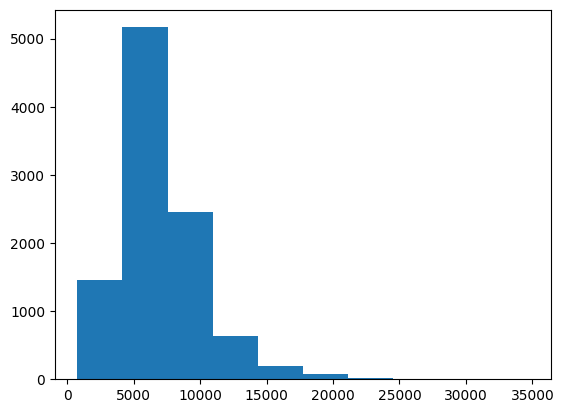

In [ ]:
plt.hist(merged_df.Sales.sample(10000))

In [ ]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams


In [ ]:
rcParams['figure.figsize'] = 30,30


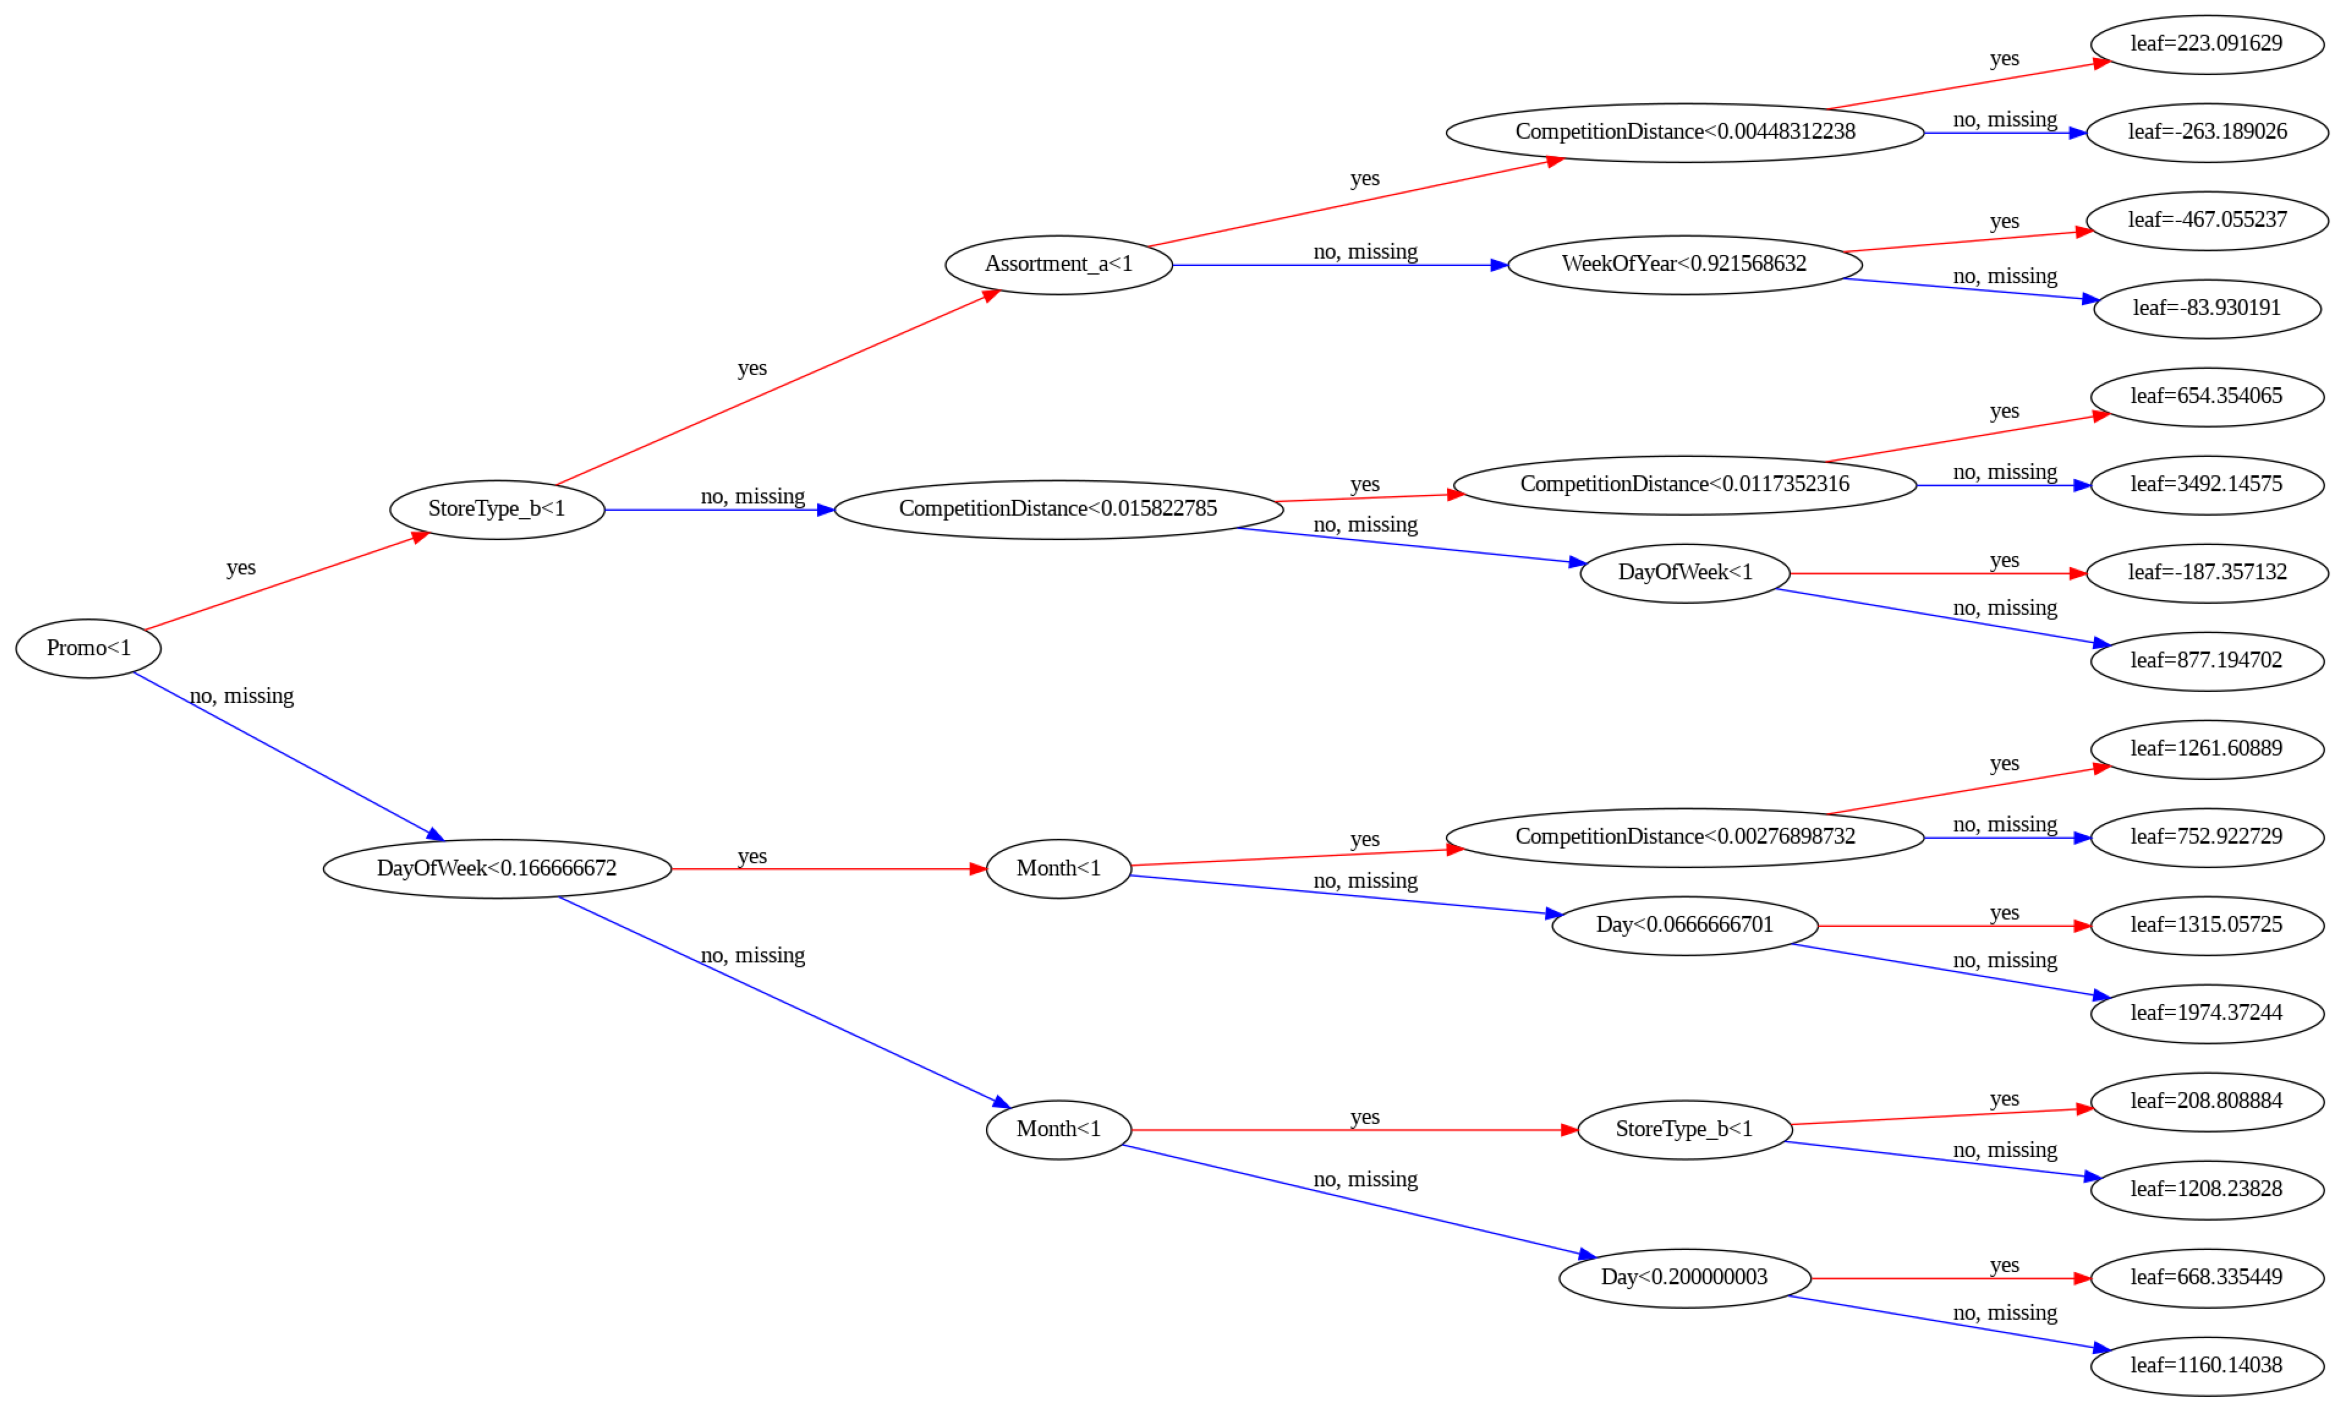

In [ ]:
plot_tree(model, rankdir = 'LR');

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Axes: >

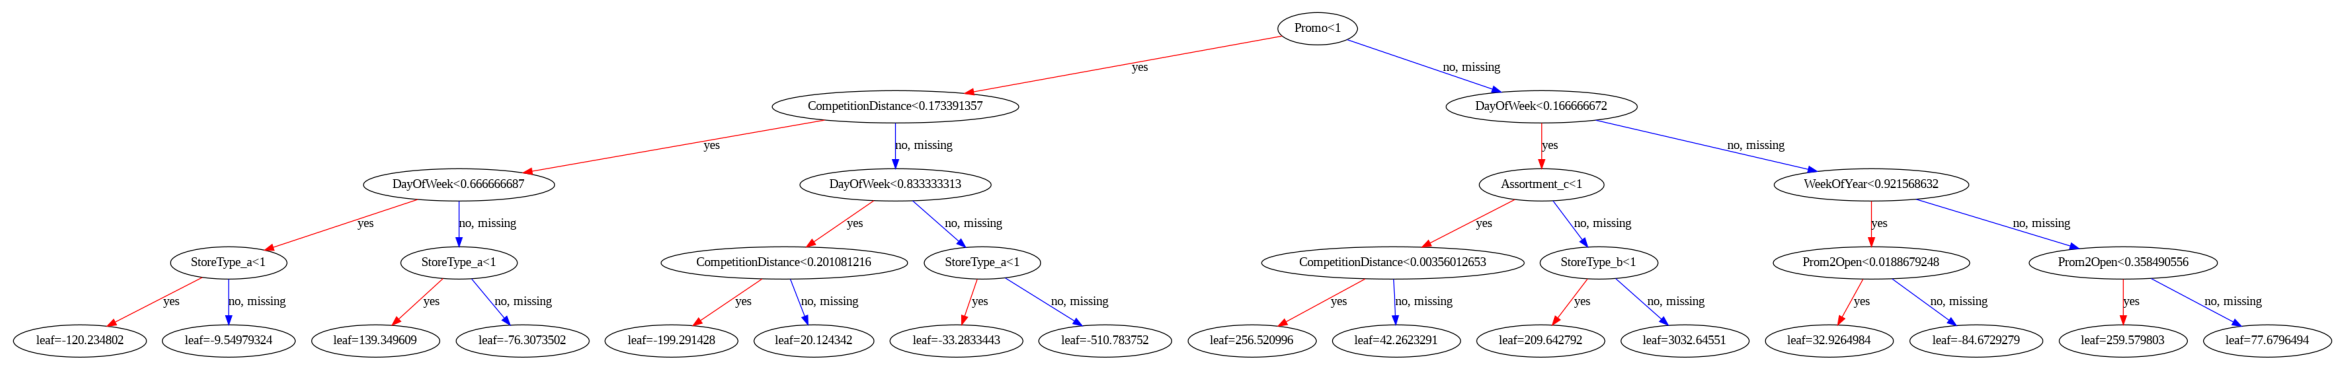

In [ ]:
plot_tree(model, num_trees = 10)

In [ ]:

from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state = 42, n_jobs = -1, n_estimators = 100 , max_depth = 4)

In [ ]:
%%time
model.fit(x,targets)


CPU times: user 11.1 s, sys: 16 ms, total: 11.1 s
Wall time: 5.79 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
preds = model.predict(x)

In [ ]:
preds

array([6961.721 , 6961.0347, 8772.095 , ..., 7922.0903, 4642.743 ,
       8122.484 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(a,b):
  return np.sqrt(mean_squared_error(a,b))

In [ ]:
rmse(preds,targets)

np.float64(1752.759253291792)

(array([1.755e+03, 5.217e+03, 2.207e+03, 5.860e+02, 1.610e+02, 5.600e+01,
        9.000e+00, 6.000e+00, 1.000e+00, 2.000e+00]),
 array([  892. ,  4372.5,  7853. , 11333.5, 14814. , 18294.5, 21775. ,
        25255.5, 28736. , 32216.5, 35697. ]),
 <BarContainer object of 10 artists>)

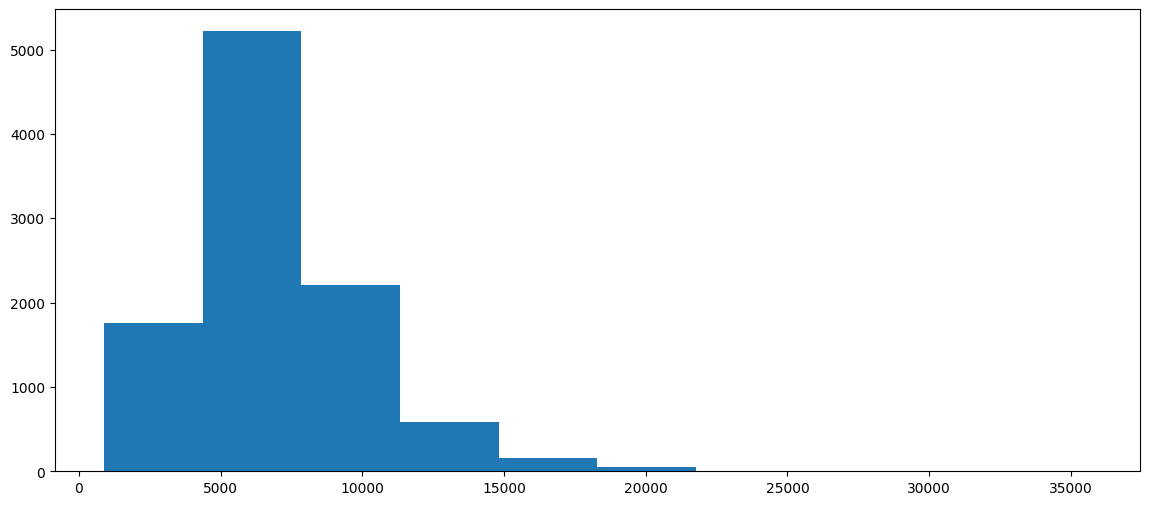

In [ ]:
plt.figure(figsize = (14,6))
plt.hist(merged_df.Sales.sample(10000))

Feature Importance

In [ ]:
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending = False)

In [ ]:
importance_df

,Feature,Importance
2,Promo,0.269041
18,StoreType_b,0.101232
21,Assortment_a,0.065205
10,Promo2,0.062170
19,StoreType_c,0.053575
20,StoreType_d,0.052670
1,DayOfWeek,0.046812
4,CompetitionDistance,0.041994
7,Month,0.037946
9,WeekOfYear,0.035584


<Axes: title={'center': 'Feature_importance'}, xlabel='Feature', ylabel='Importance'>

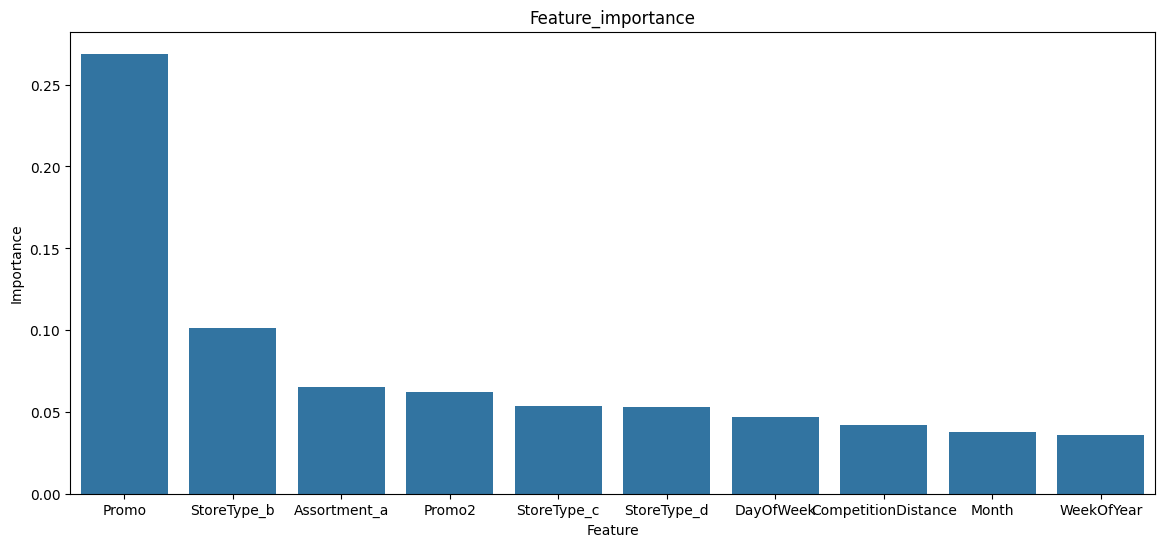

In [ ]:
import seaborn as sns
plt.figure(figsize = (14,6))
plt.title('Feature_importance')
sns.barplot(x = 'Feature', y = 'Importance', data = importance_df.head(10))

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def train_and_evaluate(x_train, train_targets ,x_val, val_targets, **params):
  model = XGBRegressor(random_state = 42 , n_jobs =-1, **params)
  model.fit(x_train,train_targets)
  train_rmse = rmse(model.predict(x_train), train_targets)
  val_rmse = rmse(model.predict(x_val), val_targets)
  return model, train_rmse, val_rmse

In [ ]:
kfold = KFold(n_splits = 5)

In [ ]:
models = []

for train_idxs, val_idxs in kfold.split(x):
  x_train, train_targets = x.iloc[train_idxs], targets.iloc[train_idxs]
  x_val, val_targets = x.iloc[val_idxs], targets.iloc[val_idxs]
  model, train_rmse, val_rmse = train_and_evaluate(x_train, train_targets, x_val, val_targets, n_estimators = 1000, max_depth = 4)
  models.append(model)

  models.append(model)
  print(f'Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}')


Train RMSE: 936.3274, Val RMSE: 1257.3145
Train RMSE: 941.5314, Val RMSE: 1174.0355
Train RMSE: 946.3525, Val RMSE: 1150.9092
Train RMSE: 935.6868, Val RMSE: 1206.0953
Train RMSE: 938.0482, Val RMSE: 1335.0685


In [ ]:
import numpy as np

def predict_avg(models, inputs):
  return np.mean([model.predict(inputs)for model in models], axis = 0)

In [ ]:
%%time
preds = predict_avg(models, x)

CPU times: user 3min 4s, sys: 322 ms, total: 3min 4s
Wall time: 1min 44s


In [ ]:
preds







array([5830.332 , 6190.5244, 9325.296 , ..., 5671.4644, 4172.542 ,
       6459.9126], dtype=float32)

In [ ]:
rmse(preds, targets)

np.float64(943.9934123181157)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, train_targets, val_targets = train_test_split(x, targets, test_size = 0.1, random_state=42)

In [ ]:
def test_params(**params):
  model = XGBRegressor(random_state = 42, n_jobs =-1, **params)
  model.fit(x_train,train_targets)
  train_rmse = rmse(model.predict(x_train), train_targets)
  val_rmse = rmse(model.predict(x_val), val_targets)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse ,val_rmse))

n_estimator

In [ ]:
test_params(n_estimators = 100)

Train RMSE: 1160.4485124295693, Validation RMSE: 1171.2297490245028


In [ ]:
test_params(n_estimators = 400)

Train RMSE: 803.3759238364067, Validation RMSE: 829.0577482901899


In [ ]:
test_params(n_estimators = 600)

Train RMSE: 741.313867400307, Validation RMSE: 775.5916693080193


In [ ]:
test_params(n_estimators = 1000)

Train RMSE: 673.9579920143391, Validation RMSE: 725.2645637972395


In [ ]:
%%time
test_params(n_estimators = 2000)

Train RMSE: 597.898533406798, Validation RMSE: 680.8465548491819
CPU times: user 5min 38s, sys: 1.03 s, total: 5min 39s
Wall time: 3min 34s


In [ ]:
test_params(n_estimators = 3000)

Train RMSE: 555.7789859737412, Validation RMSE: 664.070332306752


In [ ]:
%%time
test_params(n_estimators = 5000)

Train RMSE: 505.1399094557863, Validation RMSE: 652.3421504471407
CPU times: user 14min 19s, sys: 2.63 s, total: 14min 22s
Wall time: 8min 20s


max_depth

In [ ]:
test_params(n_estimators = 3000 , max_depth = 10)

Train RMSE: 148.0333907117749, Validation RMSE: 681.435089535313


Learning rate

In [ ]:
test_params(n_estimators = 5000 , max_depth = ???, learning_rate = 0.5)

In [ ]:
test_params(n_estimators = 5000 , max_depth = ???, learning_rate = 0.6)

In [ ]:
test_params(n_estimators = 5000, max_depth = ???, learning_rate = 0.7)

In [ ]:
test_params(n_estimators = 5000 , max_depth = ???, learning_rate = 0.8)

In [ ]:
model = XGBRegressor(random_state = 42, n_jobs = -1, n_estimators = 5000)

In [ ]:
train_preds = model.fit(x_train, train_targets)

In [ ]:
val_preds = model.predict(x_val)

In [ ]:
test_preds = model.predict(x_test)

In [ ]:
submission_df = pd.read_csv('rossmann-store-sales/sample_submission.csv')

In [ ]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [ ]:
submission_df = pd.read_csv('rossmann-store-sales/sample_submission.csv')

In [ ]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [ ]:
 submission_df['Sales'] = test_preds

In [ ]:
submission_df['Sales'] = np.where(merged_test_df['Open'] == 0, 0, submission_df['Sales'])

In [ ]:
submission_df.to_csv('submission.csv', index = False)

In [ ]:
import joblib


In [ ]:
Rossmann = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_cols': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'max_distance': max_distance,
    'test_inputs': test_inputs,
}


In [ ]:
joblib.dump(Rossmann, 'Rossmann.joblib')

['Rossmann.joblib']